# Gradient descent and its variants

<br>
<br>

**Olmo Nieto Silleras** <br>
**Interview at the Alan Turing Institute** <br>
**4 February 2019**

In [34]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rcParams['figure.dpi']= 100
#s =  mpl.rcParams["figure.figsize"]
#jupyter nbconvert nbconvert-example.ipynb --TagRemovePreprocessor.remove_input_tags="{'hide_input'}"
#TagRemovePreprocessor.remove_input_tags
#TagRemovePreprocessor.remove_single_output_tags
#TagRemovePreprocessor.remove_all_outputs_tags
#https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook

## Gradient descent

<br>

* *Optimisation* method allowing to find the (local) minima (or maxima) of a differentiable function $ f(x)$.


* For _convex_ functions, it amounts to solving the optimisation problem

$$ \min_x f(x) $$
<br>

## The gradient descent algorithm

> **given** a starting point $x \in \text{dom} \, f $
>
> **repeat**
> 
> - Calculate function gradient at point $x$
>
> $$\nabla f(x) .$$
>
>- Choose _learning rate_ $t$ and define step size $\Delta x$
> 
> $$ \Delta x := - t \nabla f(x) .  $$ 
>
> - Update
>
> $$ x := x + \Delta x .$$
>
> **until** stopping criterion is satisfied

## A simple example

Finding the minimum of $f(x) = x^2$

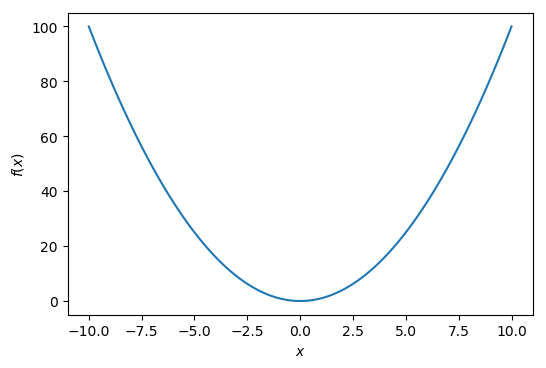

In [35]:
n_pts = 100
x = np.linspace(-10,10,n_pts)
y = x**2

fig, ax = plt.subplots()

ax.plot(x,y)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$");

In [36]:
x0 = np.random.rand()*5+5
t = 0.1
n = 100

x = x0
for i in range(n):
    x -= t*2*x

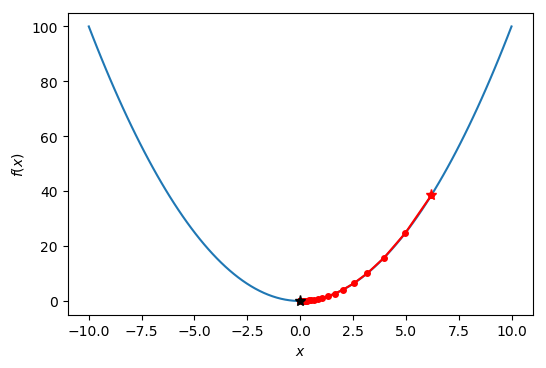

In [37]:
x0 = np.random.rand()*5+5
t = 0.1
n = 100

x = x0
x_hist = np.array([x0])

for i in range(n):
    x -= t*2*x
    x_hist = np.append(x_hist,x)

ax.plot(x_hist,x_hist**2,'-or', markersize = 4) 
ax.plot(x0,x0**2,'*r', markersize = 8)
ax.plot(x,x**2,'*k', markersize = 8)
fig

## Application to data modelling

<br>


* Gradient descent is one of the main methods used to train a model.


* Given a set of data $(x,y)$ and a model hypothesis $h_\theta(x)$ parametrised by $\theta$, 
<br> we seek to minimise a _loss function_ $L$:

$$ \min_\theta L \left (h_\theta(x),y \right) $$

### Example: linear regression with ordinary least squares

Consider a set of data points.

In [39]:
n_pts = 100
x = np.linspace(0,10,n_pts)
y = 75 - 5*x + 10*np.random.randn(n_pts)

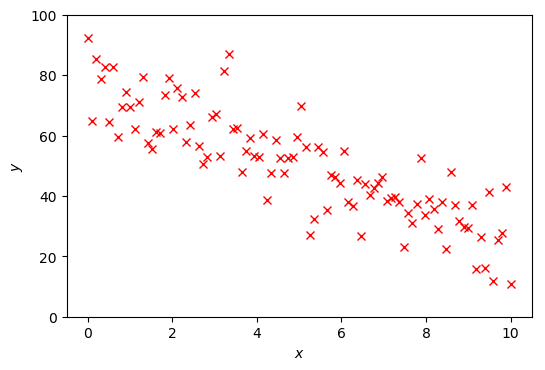

In [40]:
fig2, ax2 = plt.subplots()
ax2.plot(x,y,'xr');
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$');
ax2.set_ylim([0,100]);

### Example: linear regression with ordinary least squares

We would like to find a model of the form

$$ h_\theta(x) = \theta_0 + \theta_1 x $$

that theoretically describes the origin of these data.

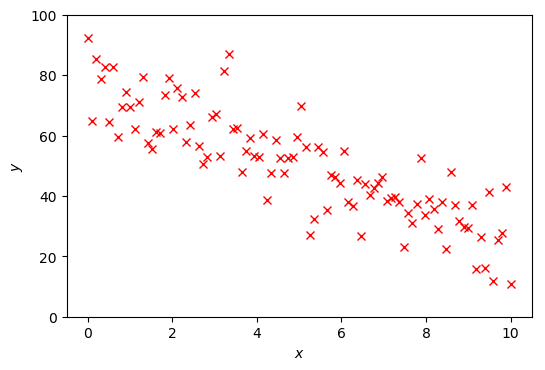

In [41]:
fig2

Consider the _ordinary least squares cost function_

$$ L(\theta) = \frac{1}{2m} \sum^m_{i=1} \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2 $$

Given a hypothesis $h_\theta$ and data points $(x,y)$, we seek to find the optimal parameters $\theta = (\theta_0, \theta_1)$ that minimise the loss function:

$$ \min_\theta L(\theta) $$

Recall the gradient descent algorithm:

> **given** a starting point $\theta \in \text{dom} \, L $
>
> **repeat**
>
> * Calculate function gradient at point $\theta$
>
> $$ \bar \nabla L(\theta) .$$
>
> * Choose _learning rate_ $t$ and define step size $\Delta \theta$
>
> $$ \Delta \theta := - t \bar \nabla L(\theta) $$ 
>
> * Update
>
> $$ \theta := \theta + \Delta \theta .$$
>
> **until** stopping criterion is satisfied

Given the loss function

$$ L(\theta) = \frac{1}{2m} \sum^m_{i=1} \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2 $$

and the linear hypothesis

$$ h_\theta(x) = \theta_0 + \theta_1 x $$

let us calculate the gradient $\bar \nabla L(\theta) $ 

\begin{align}
\frac{\partial}{\partial \theta_0} L(\theta) &= \frac{1}{m} \sum^m_{i=1} \left( h_\theta (x^{(i)}) - y^{(i)} \right) \\[12pt]
\frac{\partial}{\partial \theta_1} L(\theta) &= \frac{1}{m} \sum^m_{i=1} \left( h_\theta (x^{(i)}) - y^{(i)} \right) x^{(i)}
\end{align}

This can be written as a matrix product

$$
\begin{align}
\bar \nabla L(\theta) &= \frac{1}{m} X \left( \theta^T X - y \right)^T \\[18 pt]
L(\theta) &= \frac{1}{2m} \left\lVert \theta^T X -y \right\rVert^2
\end{align}
$$

by defining $y = (y^{(1)}, \dots, y^{(m)})$,

$$ \theta =
\begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix},
\qquad
\text{and}
\qquad
X = 
\begin{bmatrix}
1 & \dots & 1 \\
x^{(1)} & \dots & x^{(m)}
\end{bmatrix}$$ 

In [42]:
def loss_fn(theta,X,y):
    m = len(y)
    return 1/(2*m)*np.linalg.norm((theta @ X) - y, axis = 1)**2

def grad(theta,X,y):
    m = len(y)
    return 1/m*(X @ (theta @ X - y))

In [43]:
#theta0 = np.linspace(0,50,100)
#theta1 = np.linspace(-15,15,100)
theta0 = np.linspace(-100,100,100)
theta1 = np.linspace(-20,45,100)


#theta = np.mgrid[20:30:100j, 1:5:100j].reshape(2, -1).
theta_grid = np.meshgrid(theta0, theta1)
theta_flat = np.stack((theta_grid[0].flatten(),theta_grid[1].flatten()),axis=1)

m = len(x)

X = np.ones((2,m))
X[1,:] = x
z = loss_fn(theta_flat,X,y).reshape(100,100)

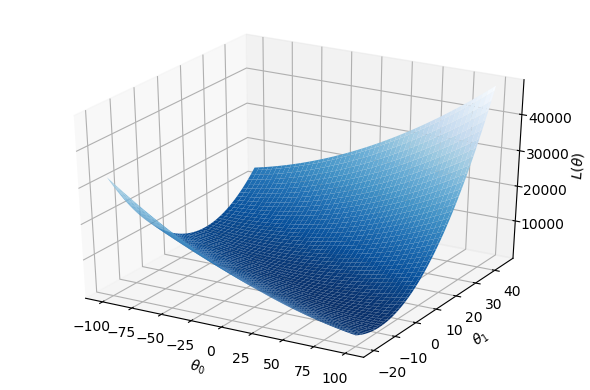

In [44]:
fig0 = plt.subplots()#figsize=plt.figaspect(.3))

ax0 = plt.axes(projection = '3d')
ax0.plot_surface(theta_grid[0],theta_grid[1],z, cmap = 'Blues_r')

ax0.set_xlabel(r'$ \theta_0 $')
ax0.set_ylabel(r'$\theta_1$');
ax0.set_zlabel(r'$L(\theta)$');
#plt.subplots_adjust(wspace = 0.3)
plt.tight_layout()

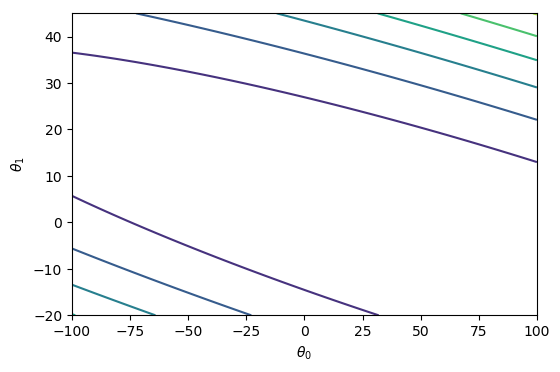

In [45]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.contour(theta_grid[0],theta_grid[1],z)

ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$');

In [46]:
theta_0 = np.array([-75,-15]).astype('float')
t = 0.01
n = 5000

theta = np.copy(theta_0)

theta_hist = np.zeros((n+1,2))
theta_hist[0,:] = theta_0

In [ ]:
for i in range(n):
    theta -= t*grad(theta,X,y)
    theta_hist[i+1,:] = theta

theta* =  [77.04972822 -5.29610426]


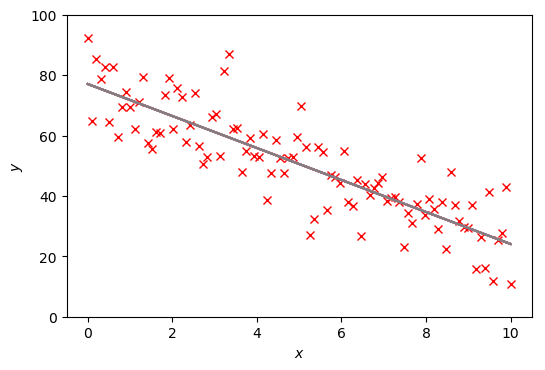

In [54]:
print('theta* = ', theta)

ax2.plot(x,np.dot(theta,X))
fig2

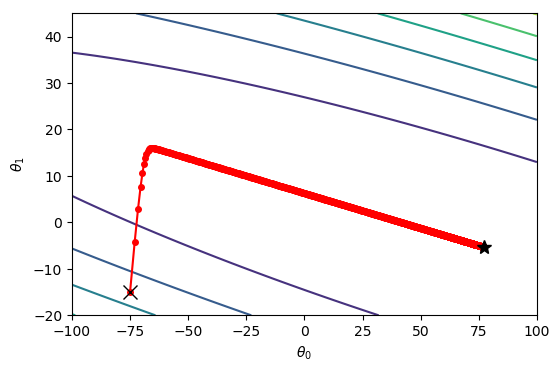

In [55]:
fig = plt.figure()
ax1 = plt.axes()
ax1.contour(theta_grid[0],theta_grid[1],z)

ax1.plot(theta_hist[:,0], theta_hist[:,1],'o-r', markersize = 4);
ax1.plot(theta_hist[0,0], theta_hist[0,1],'xk', markersize = 10);
ax1.plot(theta_hist[n,0], theta_hist[n,1],'*k', markersize = 10);

ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$');

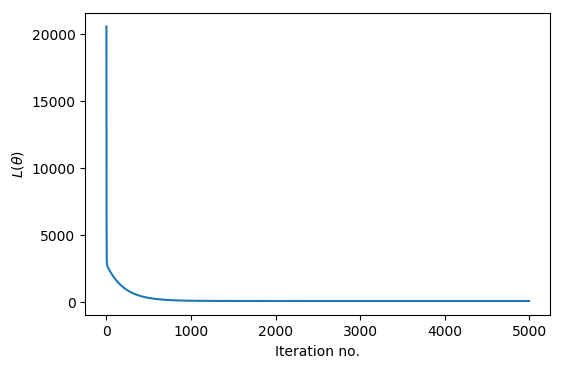

In [56]:
loss_hist = loss_fn(theta_hist,X,y)

fig = plt.figure()
ax0 = plt.axes()

#ax0.loglog(np.arange(0,n+1), loss_hist)
ax0.plot(np.arange(0,n+1), loss_hist)

ax0.set_xlabel('Iteration no.')
ax0.set_ylabel(r'$L(\theta)$');

#plt.subplots_adjust(wspace = 0.3)

## Variants of gradient descent

### Momentum

Slight modification to gradient descent
> **given** a starting point $\theta \in \text{dom} \, L $
>
> **repeat** at each iteration $k$
>
> * Calculate function gradient at point $\theta_k$
>
> $$ \bar \nabla L(\theta_k).$$
>
> * Choose step size $t$ and momentum factor $\gamma$
>
> $$ \Delta \theta_{k} := - \gamma \Delta\theta_{k-1} - t \bar \nabla L(\theta_k)  \qquad \gamma \in [0,1]. $$
>
> * Update
>
> $$ \theta_{k+1} := \theta_k + \Delta \theta_{k} .$$
>
> **until** stopping criterion is satisfied

### Nesterov accelerated gradient (NAG)

> **given** a starting point $\theta \in \text{dom} \, L $
>
> **repeat** at each iteration $k$
>
> * Calculate function gradient at point $ \theta_k' \equiv \theta_k - \gamma \Delta\theta_{k-1}$
>
> $$ \bar \nabla L(\theta_k - \gamma \Delta\theta_{k-1}).$$
>
> * Choose step size $t$ and momentum factor $\gamma$
>
> $$ \Delta \theta_{k} := - \gamma \Delta\theta_{k-1} - t \bar \nabla L(\theta_k')  \qquad \gamma \in [0,1]. $$
>
> * Update
>
> $$ \theta_{k+1} := \theta_k + \Delta \theta_{k} .$$
>
> **until** stopping criterion is satisfied

In [57]:
t = 0.01
n = 150
gamma = 0.9

In [ ]:
theta = np.copy(theta_0)
theta_m_hist = np.zeros((n+1,2))
theta_m_hist[0,:] = theta_0

In [ ]:
# Momentum

delta = 0

for i in range(n):
    delta = gamma*delta + t*grad(theta,X,y)
    theta -= delta
    
    theta_m_hist[i+1,:] = theta

In [ ]:
theta = np.copy(theta_0)
theta_nag_hist = np.zeros((n+1,2))
theta_nag_hist[0,:] = theta_0


In [58]:
# Nesterov accelerated gradient

delta_nag = 0

for i in range(n):
    delta_nag = gamma*delta_nag + t*grad(theta - gamma*delta_nag,X,y)
    theta -= delta_nag
    
    theta_nag_hist[i+1,:] = theta

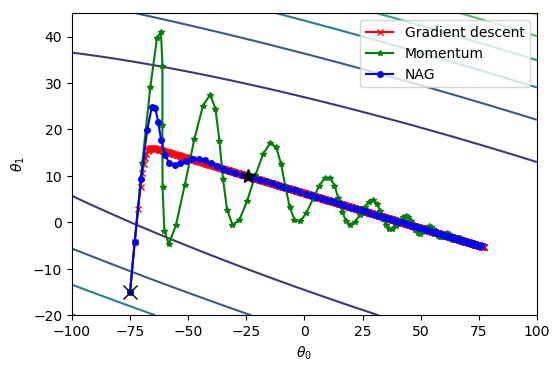

In [59]:
fig = plt.figure()
ax = plt.axes()
ax.contour(theta_grid[0],theta_grid[1],z)

ax.plot(theta_hist[:,0], theta_hist[:,1],'x-r', markersize = 4, label = "Gradient descent");
ax.plot(theta_m_hist[:,0], theta_m_hist[:,1],'*-g', markersize = 4, label = "Momentum");
ax.plot(theta_nag_hist[:,0], theta_nag_hist[:,1],'o-b', markersize = 4, label = "NAG");
ax.plot(theta_hist[0,0], theta_hist[0,1],'xk', markersize = 10);
ax.plot(theta_hist[n,0], theta_hist[n,1],'*k', markersize = 10);

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

ax.legend();

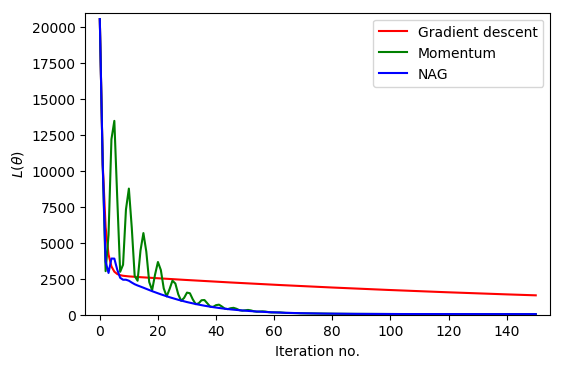

In [60]:
loss_hist = loss_fn(theta_hist,X,y)
loss_m_hist = loss_fn(theta_m_hist,X,y)
loss_nag_hist = loss_fn(theta_nag_hist,X,y)

fig = plt.figure()
ax0 = plt.axes()

#ax0.loglog(np.arange(0,n+1), loss_hist)
ax0.plot(np.arange(0,n+1), loss_hist[:n+1],'r', label = "Gradient descent")
ax0.plot(np.arange(0,n+1), loss_m_hist,'g', label = "Momentum")
ax0.plot(np.arange(0,n+1), loss_nag_hist,'b', label = "NAG")


ax0.set_xlabel('Iteration no.')
ax0.set_ylabel(r'$L(\theta)$')
ax0.set_xlim([-5,155])
ax0.set_ylim([0,21000])

ax0.legend();

#plt.subplots_adjust(wspace = 0.3)